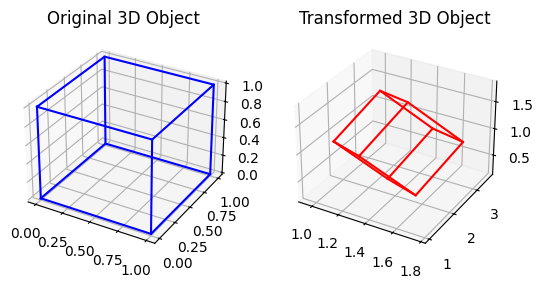

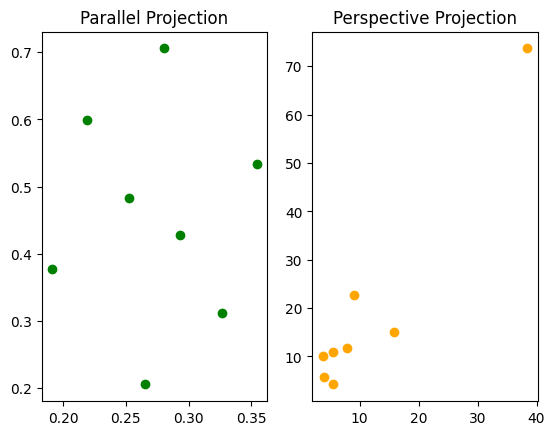

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def translation(tx, ty, tz):
    return np.array([
        [1, 0, 0, tx],
        [0, 1, 0, ty],
        [0, 0, 1, tz],
        [0, 0, 0, 1]
    ])

def rotation_x(theta):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    return np.array([
        [1, 0, 0, 0],
        [0, cos_theta, -sin_theta, 0],
        [0, sin_theta, cos_theta, 0],
        [0, 0, 0, 1]
    ])

def rotation_y(theta):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    return np.array([
        [cos_theta, 0, sin_theta, 0],
        [0, 1, 0, 0],
        [-sin_theta, 0, cos_theta, 0],
        [0, 0, 0, 1]
    ])

def rotation_z(theta):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    return np.array([
        [cos_theta, -sin_theta, 0, 0],
        [sin_theta, cos_theta, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])

def scaling(sx, sy, sz):
    return np.array([
        [sx, 0, 0, 0],
        [0, sy, 0, 0],
        [0, 0, sz, 0],
        [0, 0, 0, 1]
    ])

def apply_transform(points, transformation):
    homogeneous_points = np.column_stack((points, np.ones(len(points))))
    transformed_points = np.dot(homogeneous_points, transformation.T)
    return transformed_points[:, :-1]

def parallel_projection(points, d):
    return points[:, :2] / d

def perspective_projection(points, d):
    return points[:, :2] / (points[:, 2].reshape(-1, 1) / d)

# Define original points of the 3D object (cube)
points = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

# Apply transformations
tx, ty, tz = 1, 2, 1  # Translation values
theta_x = np.pi/3  # Rotation angle around x-axis (in radians)
theta_y = np.pi/4  # Rotation angle around y-axis (in radians)
theta_z = np.pi/6  # Rotation angle around z-axis (in radians)
sx, sy, sz = 0.5, 1.5, 1  # Scaling factors

translation_matrix = translation(tx, ty, tz)
rotation_x_matrix = rotation_x(theta_x)
rotation_y_matrix = rotation_y(theta_y)
rotation_z_matrix = rotation_z(theta_z)
scaling_matrix = scaling(sx, sy, sz)

# Apply transformations one by one
transformed_points = apply_transform(points, translation_matrix)
transformed_points = apply_transform(transformed_points, rotation_x_matrix)
transformed_points = apply_transform(transformed_points, rotation_y_matrix)
transformed_points = apply_transform(transformed_points, rotation_z_matrix)
transformed_points = apply_transform(transformed_points, scaling_matrix)

def plot_3d_object(ax, points, color):
    lines = [
        [points[0], points[1], points[2], points[3], points[0]],
        [points[4], points[5], points[6], points[7], points[4]],
        [points[0], points[4]],
        [points[1], points[5]],
        [points[2], points[6]],
        [points[3], points[7]]
    ]
    for line in lines:
        ax.plot3D([point[0] for point in line], [point[1] for point in line], [point[2] for point in line], color=color)

# Plot original 3D object
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
plot_3d_object(ax, points, color='blue')
ax.set_title('Original 3D Object')

# Plot transformed 3D object
ax = fig.add_subplot(122, projection='3d')
plot_3d_object(ax, transformed_points, color='red')
ax.set_title('Transformed 3D Object')

# Apply projections
d = 5  # Distance to the projection plane
parallel_projection_points = parallel_projection(transformed_points, d)
perspective_projection_points = perspective_projection(transformed_points, d)

# Plot projections
fig, axes = plt.subplots(1, 2)
axes[0].scatter(parallel_projection_points[:,0], parallel_projection_points[:,1], color='green')
axes[0].set_title('Parallel Projection')
axes[1].scatter(perspective_projection_points[:,0], perspective_projection_points[:,1], color='orange')
axes[1].set_title('Perspective Projection')

plt.show()